In [148]:
%run "../../PyUtils/common.ipynb"

fileName="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
dfOriginal[0:4]

<IPython.core.display.Javascript object>

,date,day,sdate,stime,edate,etime,durationhours,so2,co,o3,no2,pm10,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tatmeasurement,aatmeasurement,patmeasurement,season,pef,indexpef,extradate
0,2015-01-01,4,2014-12-31,18:11:00,2015-01-01,18:26:00,None,0.098,12.500,0.488,0.301,1770.000,-0.800,1021.500,58.000,-8.500,1014.800,30.000,-5.600,1019.100,38.000,7.700,6.700,28.000,-5.600,1021.300,44.000,4,290.000,Y,2015-01-01
1,2015-01-02,5,2015-01-01,18:26:00,2015-01-02,17:30:00,None,0.088,13.500,0.386,0.401,633.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,-7.300,1020.500,31.000,7.500,2.300,37.000,-2.500,1021.700,33.000,4,263.000,Y,2015-01-02
2,2015-01-03,6,2015-01-02,17:30:00,2015-01-03,18:15:00,None,0.173,19.200,0.229,0.719,968.000,1.900,1023.400,71.000,-9.600,1017.100,34.000,-7.400,1023.200,40.000,11.500,6.300,37.000,1.200,1017.100,60.000,4,265.000,Y,2015-01-03
3,2015-01-04,0,2015-01-03,18:15:00,2015-01-04,18:05:00,None,0.148,17.400,0.161,0.867,908.000,7.600,1017.100,76.000,0.200,1012.900,59.000,0.700,1013.600,65.000,7.400,4.200,17.000,3.400,1014.400,76.000,4,269.000,Y,2015-01-04


In [149]:
df=dfOriginal.copy()
df=df.fillna(0)
df.loc[df.stime == 'null', 'stime'] = "00:00:00"
df.loc[df.etime == 'null', 'etime'] = "00:00:00"
sdttm = df.sdate + " " + df.stime
edttm = df.edate + " " + df.etime
df.insert(0, 'sdttm', sdttm)
df.insert(1, 'edttm', edttm)

df.sdttm = pd.to_datetime(df.sdttm)
df.edttm = pd.to_datetime(df.edttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
df=df.drop(['date', 'sdate', 'stime', 'edate', 'etime', 'indexpef', 'extradate'], axis=1)
df.durationhours = (df.edttm - df.sdttm).apply(lambda x: x.total_seconds()/(60*60) )
df=df.reset_index(drop=True)

df = df[df.pef > 100]
pef = df.pef;

df=df.drop(['edttm', 'pef'], axis=1)
df.insert(1, 'pef1', pef)

pef[-10:]=0     # Set last 10 to zero for predictions
df.insert(1, 'pef', pef)

#df.to_csv("HanD/hand1.csv", sep=';')
df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df

,sdttm,pef,pef1,day,durationhours,so2,co,o3,no2,pm10,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tatmeasurement,aatmeasurement,patmeasurement,season
0,2014-12-31 07:12:00,258.000,258.000,4,24.500,0.106,12.400,0.441,0.425,1362.000,2.500,1019.600,91.000,-8.400,1012.300,30.000,-2.400,1012.400,38.000,10.900,7.300,61.000,-8.400,1019.600,39.000,4
1,2014-12-31 18:11:00,290.000,290.000,4,24.250,0.098,12.500,0.488,0.301,1770.000,-0.800,1021.500,58.000,-8.500,1014.800,30.000,-5.600,1019.100,38.000,7.700,6.700,28.000,-5.600,1021.300,44.000,4
2,2015-01-01 07:42:00,279.000,279.000,5,22.700,0.079,12.900,0.436,0.298,1083.000,-3.900,1022.200,63.000,-8.500,1020.100,35.000,-7.300,1021.600,56.000,4.600,2.100,28.000,-6.800,1020.500,58.000,4
3,2015-01-01 18:26:00,263.000,263.000,5,23.067,0.088,13.500,0.386,0.401,633.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,-7.300,1020.500,31.000,7.500,2.300,37.000,-2.500,1021.700,33.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2015-12-29 06:16:00,0.000,265.000,3,24.633,0.186,23.900,0.075,1.103,1692.000,2.700,1030.900,77.000,-9.100,1027.200,38.000,-0.900,1027.200,40.000,11.800,3.700,39.000,-0.900,1027.200,57.000,4
727,2015-12-29 18:05:00,0.000,238.000,3,24.117,0.173,23.200,0.100,1.073,1714.000,5.700,1028.200,89.000,-2.900,1022.200,47.000,-0.900,1027.200,50.000,8.600,6.000,42.000,2.600,1023.100,89.000,4
728,2015-12-30 06:54:00,0.000,225.000,4,24.033,0.134,19.000,0.109,0.878,1414.000,5.700,1027.000,100.000,-1.900,1022.200,47.000,1.800,1022.600,100.000,7.600,4.800,53.000,1.300,1024.100,96.000,4
729,2015-12-30 18:12:00,0.000,225.000,4,23.917,0.135,18.100,0.160,0.754,1366.000,5.400,1028.100,100.000,1.000,1022.600,60.000,1.800,1023.000,100.000,4.400,5.500,40.000,1.900,1028.100,73.000,4


Index(['sdttm', 'pef', 'pef1', 'day', 'durationhours', 'so2', 'co', 'o3', 'no2', 'pm10', 'tmax', 'amax', 'pmax', 'tmin', 'amin', 'pmin', 'tmode', 'amode', 'pmode', 'tmaxlesstmin', 'amaxlessamin', 'pmaxlesspmin', 'tatmeasurement', 'aatmeasurement', 'patmeasurement', 'season'], dtype='object')
Dropping in prepareDF -  Index([], dtype='object')


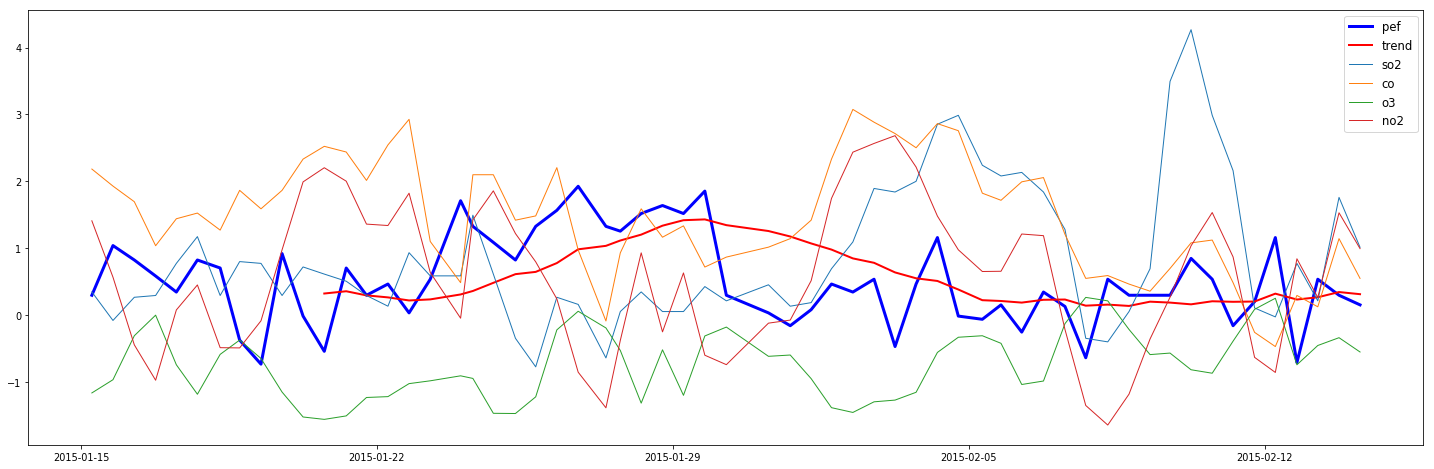

In [150]:
print(df1.columns)

scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    dp[c] = scaler.fit_transform(dp[c])

plt.figure(figsize=(25, 8))
plt.rc('font', size=14)

dp = dp[30:90]
dp = dp["so2,pef,co,o3,no2,pm10,tmax".split(',')]
rolmean = pd.rolling_mean(dp.pef, window=12)

plt.plot(dp.index, dp.pef, color='b', linewidth=3)
plt.plot(dp.index, rolmean, color='r', linewidth=2, label='trend')
plt.plot(dp.index, dp.so2)
plt.plot(dp.index, dp.co)
plt.plot(dp.index, dp.o3)
plt.plot(dp.index, dp.no2)
#plt.plot(dp.index, dp.pm10)
#plt.plot(dp.index, dp.tmax)
#plt.plot(dp.index, dp.amax)
#plt.plot(dp.index, dp.pmax)

plt.legend()

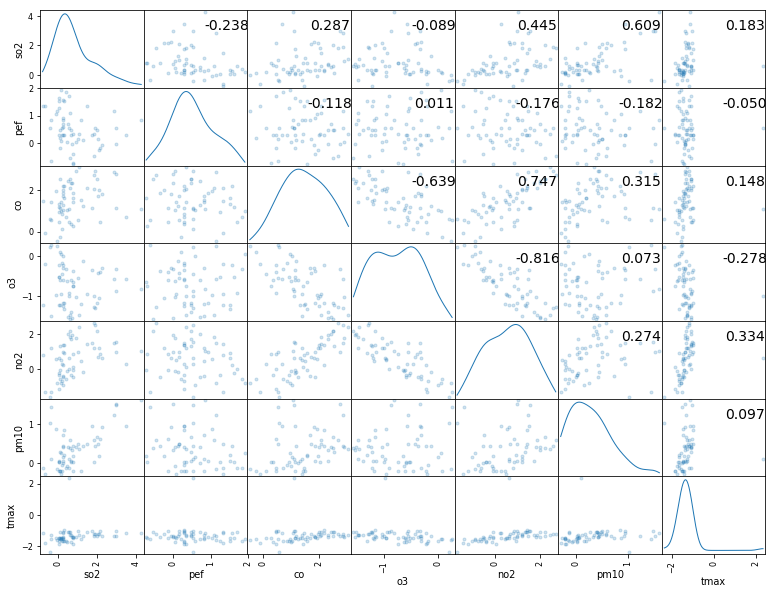

In [151]:
c="r,g,b,c,m,y,k,w".split(",")
axes = scatter_matrix(dp, alpha=0.2, diagonal='kde', figsize=(13, 10)); # diagonal can be 'hist';

corr = dp.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


In [152]:
def run_reg(X,y,reg_class,printDebug = False , reg=None):
    # Construct a kfolds object
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    # Iterate through folds\
    i = 0;
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = reg_class(**kwargs) if (reg is None)  else reg;
        if (printDebug): print ("*",i, end ="");
        reg.fit(X_train,y_train)
        y_pred[test_index] = reg.predict(X_test)
        i = i +1;
    if (printDebug): print ("*");
    return y_pred, clf

In [153]:
from sklearn.tree import DecisionTreeRegressor

dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pef']
y = dp1.pef
X = X.as_matrix().astype(np.float)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)
#regr_1.fit(X, y)
#regr_2.fit(X, y)
y1 = run_reg(X,y, None, True, regr_1)
y2 = run_reg(X,y, None, True, regr_2)

* 0* 1* 2* 3* 4*
* 0* 1* 2* 3* 4*


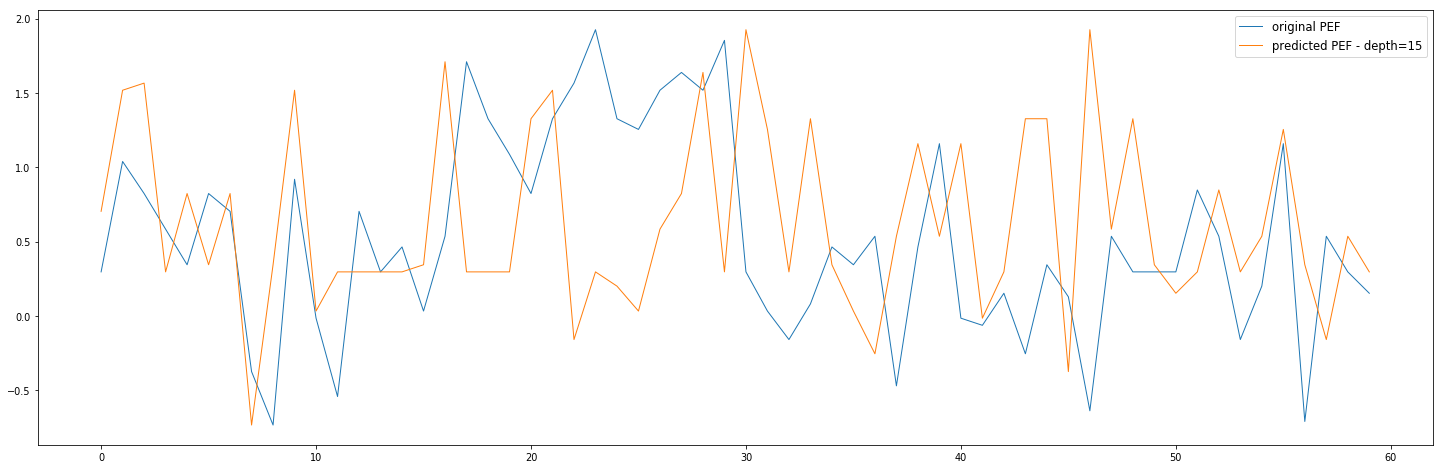

In [156]:
plt.figure(figsize=(25, 8))
plt.plot(y, label='original PEF')
#plt.plot(y1[0])
plt.plot(y2[0], label='predicted PEF - depth=15')
plt.legend()

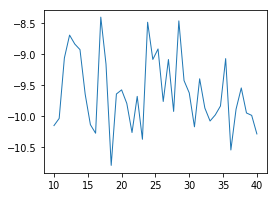

In [133]:
from sklearn.model_selection import cross_val_score
m = list()
ds = np.linspace(10, 40, 40)
for d in (ds):
    r = DecisionTreeRegressor(max_depth=d)
    a = cross_val_score(r, X, y, cv=10)
    m.append(np.mean(a))
    #print(d, a)
    
plt.plot(ds, m)


In [146]:
#np.mean(y1[0] - y)
#r.feature_importances_
r.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(criterion='mse', max_depth=40.0, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>